# Home task II 

## *Задача 1.  Генератор матриц* 

Реализовать генератор матрциц, который должен поддерживать функции(без использования циклов):
* Генерация абсолютно случайной матрицы $n\times m$
* Генерация случайной диагональной матрицы $n\times n$
* Генерация случайной верхнетреугольной матрицы
* Генерация случайной нижнетреугольной матрицы
* Генерация симметричной матрицы
* Генерация вырожденной матрицы
* Генерация матрицы ступенчатого вида $n\times n$ ранга $m$
* Генерация возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$

Оценить вероятность того, что созданная матрица будет вырожденной. 

Оценить величину нормы матрицы возмущений в зависимости от параметра $\varepsilon$ (оценить верхную границу).


### Решение

In [3]:
import numpy as np
import random
n = 6
m = 5
print(f"Абсолютно случайная матрица n*m({n = }, {m = })")
def randMatrix(n,m):
    return np.random.random((n, m))
print(randMatrix(n,m))

print(f"Диагональная случайная матрица n*n ({n = })")
# is equal np.fill_diagonal(np.zeros((n, n), float), np.random.rand(n))
def randDiagMatrix(n):
    a = np.zeros((n,n), float)
    np.fill_diagonal(a, np.random.rand(n))
    return a
print(randDiagMatrix(n))

print("Случайная верхнетреугольная матрица")
def lowTriMatrix(n):
    return np.tril(np.random.random((n)), k = 0)
print(lowTriMatrix(n))

print("Случайная нижнетреугольная матрица")
def upTriMatrix(n):
    return np.triu(np.random.random((n)), k = 0)
print(upTriMatrix(n))

print("Симметричная матрица")
def SymmetricMatrix(n):
    a = np.random.rand(n, n)
    a = np.tril(a) + np.tril(a).T
    return a
print(SymmetricMatrix(n))

print("Вырожденная матрица")
def degenerateMatrix(n):
#     print(f'{np.linalg.det(a) = }')
    a = np.random.rand(n, n)
    a[np.random.randint(1,n)] = a[0]/np.random.randint(1,n)
    return a
print(degenerateMatrix(n))

print(f"Ступенчатая матрица n*n({n = }) ранга {m = }.")
def StepMatrix(n, m):    
    a = np.random.random((n, n))
    sh1 = np.triu(np.ones((m, m)))
    sh2 = np.ones((m, n - m))
    sh3 = np.zeros((n - m, n))
    shape = np.vstack((np.hstack((sh1, sh2)), sh3))
    a = a * shape
    return a
print(StepMatrix(6, 3))

print(f"Матрица возмущения n*m ({n = }, {m = }), каждый элемент которой не превосходит по модулю заданный  e")
def perturbationMatrix(n, m, e = 1):
    a = np.random.random((n, m)) * e
    return a
print(perturbationMatrix(n, m, e = 0.4))

Абсолютно случайная матрица n*m(n = 6, m = 5)
[[0.49049399 0.6039162  0.28209425 0.83876503 0.83548449]
 [0.01931328 0.49695745 0.19209299 0.90775723 0.54492828]
 [0.66435836 0.69645732 0.7530037  0.56514957 0.53329282]
 [0.32472772 0.6250934  0.37194013 0.13330563 0.32812438]
 [0.49121994 0.65154734 0.30529978 0.18377991 0.84999391]
 [0.15995274 0.36432788 0.51589405 0.55956635 0.00878839]]
Диагональная случайная матрица n*n (n = 6)
[[0.92682279 0.         0.         0.         0.         0.        ]
 [0.         0.01740287 0.         0.         0.         0.        ]
 [0.         0.         0.61565611 0.         0.         0.        ]
 [0.         0.         0.         0.80935335 0.         0.        ]
 [0.         0.         0.         0.         0.67570953 0.        ]
 [0.         0.         0.         0.         0.         0.79565935]]
Случайная верхнетреугольная матрица
[[0.9176016  0.         0.         0.         0.         0.        ]
 [0.9176016  0.06008733 0.         0.     

2. Оценим величину нормы матрицы возмущений в зависимости от параметра $\varepsilon$ (оценив верхную границу):

Известно, что $|a_{ij}| \leq \varepsilon $. Тогда для первой нормы получаем:
$$\|A(\varepsilon)\|_1 = \max\limits_{j}\sum\limits_{i = 1}^{n}|a_{ij}| \leq \max\limits_{j}\sum\limits_{i = 1}^{n}\varepsilon = n\cdot \varepsilon $$

Для бесконечной нормы: 
$$\|A(\varepsilon)\|_{\infty} = \max\limits_{i}\sum\limits_{j = 1}^{m}|a_{ij}| \leq \max\limits_{i}\sum\limits_{j = 1}^{m}\varepsilon = m\cdot \varepsilon $$

# Задача 3. Эквивалентность первых двух норм.

Найдите константы $C_1$  и  $C_2$ такие, что

$\ C_1||\mathbf{x}||_2\leq||\mathbf{x}||_1\leq C_2||\mathbf{x}||_2$ 


Указание: в качестве подсказки можно использовать визуализацию норм из документа с теорией.

### Решение

$\|\mathbf{x}\|_1 =\sum\limits_{i = 1}^{n} |x_i| $

$\|\mathbf{x}\|_2 = \sqrt{\sum\limits_{i = 1}^{n}x_i^2}$

Из дополнительных материалов (Избранные задачи МГУ векторные и матричные нормы пособие):

1. $ \sqrt{\sum\limits_{i = 1}^{n}x_i^2} \leq \bigg(\sum\limits_{i = 1}^{n} |x_i|\bigg) ^2 \implies \|\mathbf{x}\|_2 \leq  \|\mathbf{x}\|_1 \implies C_1 = 1 $ 
2. По неравенству Коши-Буняковского: 
$ \bigg(\sum\limits_{i = 1}^{n} a_i b_i\bigg)^2 \leq \sum\limits_{i = 1}^{n} a_i^2 \cdot \sum\limits_{i = 1}^{n} b_i^2$

$\hspace{0.5cm}$ 
$ \|\mathbf{x}\|_1 = \sum\limits_{i = 1}^{n} |x_i| \leq \sqrt{\sum\limits_{i = 1}^{n} 1} \cdot \sqrt{\sum\limits_{i = 1}^{n} x_{i}^2} = \sqrt{n} \cdot \sqrt{\sum\limits_{i = 1}^{n} x_{i}^2} = \sqrt{n} \cdot \|\mathbf{x}\|_2 \implies \|\mathbf{x}\|_1 \leq \sqrt{n} \cdot \|\mathbf{x}\|_2 \implies C_2 = \sqrt{n} $

$\large\text{Ответ:}$ $\hspace{1cm}$ $\|\mathbf{x}\|_2 \leq \|\mathbf{x}\|_1 \leq \sqrt{n} \cdot \|\mathbf{x}\|_2 $

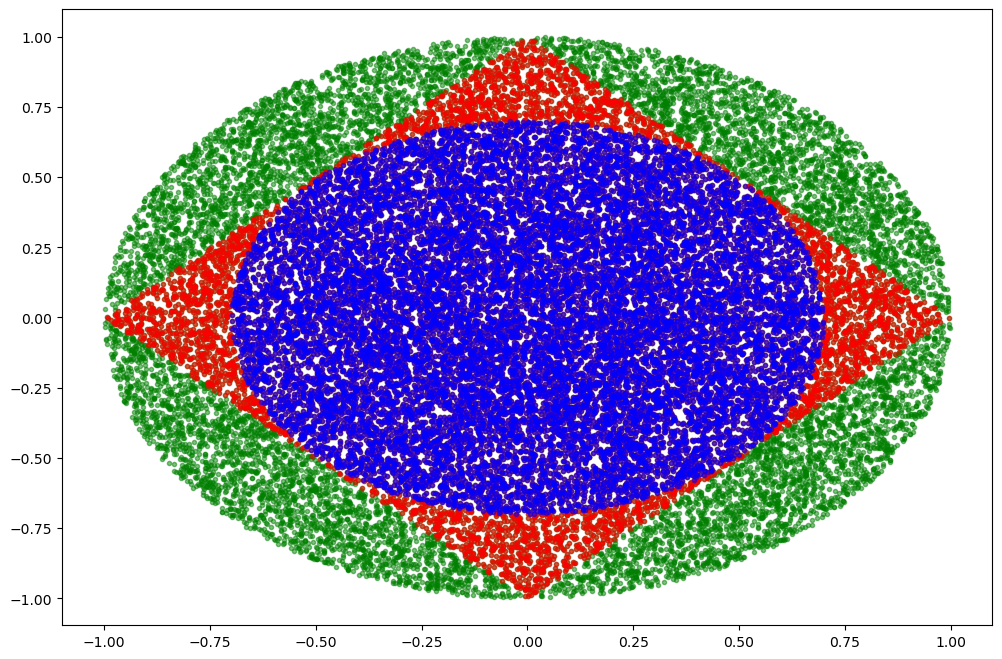

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
p = 1 #   Which norm do we use
M = 80000 #   Number of sampling points
a = np.random.randn(M, 2)
k = 1
b = []
for i in range(M):
    if np.linalg.norm(a[i, :], p) <= k:
        b.append(a[i, :])
b = np.array(b)

p = 2
c = []
for i in range(M):
    if np.linalg.norm(a[i, :], p) <= k:
        c.append(a[i, :])
c = np.array(c)

d = []
for i in range(M):
    if np.linalg.norm(a[i, :], p) <= 0.7 * k:
        d.append(a[i, :])
d = np.array(d)

plt.figure(figsize = (12,8))
plt.plot(c[:, 0], c[:, 1], 'g.', alpha=0.5)
plt.plot(b[:, 0], b[:, 1], 'r.', alpha=0.5)
plt.plot(d[:, 0], d[:, 1], 'b.', alpha=0.5)
plt.show()

# Задача 4.  Евклидова и бесконечная норма.


 Пусть x — вектор размерности m, а A — матрица m×n. Докажите следующие неравенства и приведите
примеры таких x и A, при которых неравенства обращаются в равенства: 

- $\|x\|_2 \leq \sqrt{m}\|x\|_{\infty}$
- $\|A\|_{\infty} \leq \sqrt{n}\|A\|_2$

### Решение

1) $\|\mathbf{x}\|_2 = \sqrt{\sum\limits_{i = 1}^{m}x_i^2} = \sqrt{x_1^2+x_2^2+\dotsc+x_m^2} \leq \sqrt{x_{max}^2+x_{max}^2+\dotsc+x_{max}^2}= \sqrt{m\cdot x_{max}^2} = \sqrt{m}\cdot |x_{max}| = \sqrt{m}\cdot \max\limits_{i}|x_i| = \sqrt{m}\cdot\ \|\mathbf{x}\|_{\infty} \hspace{0.5cm} ч.т.д $

Неравенство обращается в равенство, если все элементы вектора $\mathbf{x}$ равны по модулю друг другу

2) Матричная норма $\|A\|_{k}$ является подчинённой векторной норме $\|\mathbf{x}\|_{k}$. Поэтому справедливо: $ \|A\|_{k} = \max\limits_{x\neq0}\frac{\|Ax\|_{k}}{\|x\|_{k}} $

Так же для векторных норм известно соотношение эквивалентности: $ \|x\|_{\infty} \leq \|x\|_2  \leq \sqrt{n} \cdot \|x\|_{\infty} \hspace{0.5cm} \implies \hspace{0.5cm}  \frac{1}{\sqrt{n}}\|x\|_2 \leq  \|x\|_{\infty}$

$$ \frac{1}{\frac{1}{\sqrt{n}} \|x\|_2} \geq  \frac{1}{\|x\|_{\infty}} \hspace{0.5cm} \implies \hspace{0.5cm}\frac{1}{\|x\|_{\infty}} \leq \frac{1}{\frac{1}{\sqrt{n}} \|x\|_2}$$ 

Получаем:
$$ \|A\|_{\infty} = \max_{x\neq0} \frac{\|Ax\|_{\infty}}{\|x\|_{\infty}} \leq \max_{x\neq 0}\frac{\| Ax\|_2}{\frac{1} {\sqrt{n}} \|x\| _2} = \sqrt{n} \max_{x\neq 0}\frac{\| Ax \|_2}{\| x \| _2} = \sqrt{n} \cdot \|A \|_2 \hspace{0.5cm} ч.т.д $$

Найдём такие $A$, при которых неравентсво обращается в равенство: $$ \|A\|_{\infty} = \sqrt{n} \cdot \|A \|_2$$

$$ \max\limits_{i} \displaystyle\sum_{j=1}^{n} |a_{ij}|= \sqrt{n\cdot \lambda_{max}(A^*A)}$$

Рассмотрим для квадратной матрицы $n = 2$:

$$A= \begin{pmatrix}
  x & a \\
  b & c\\
 \end{pmatrix}$$

 Считаем спектральную норму:

 $$A^{T}A = \begin{pmatrix}
  x & b \\
  a & c\\
 \end{pmatrix}\begin{pmatrix}
  x & a \\
  b & c\\
 \end{pmatrix} = \begin{pmatrix}
  x^2+a^2 & xa+cb \\
  xa+cb  & b^2+c^2\\
 \end{pmatrix} \implies det \begin{pmatrix}
  x^2+a^2-\lambda & xa+cb \\
  xa+cb & b^2+c^2-\lambda\\
 \end{pmatrix} = 0 $$

 $$(x^2+b^2-\lambda)(a^2+c^2-\lambda) = 2(xa+cb)$$

 $$\lambda^2 - (x^2+a^2+b^2+c^2)\lambda+(x^2+b^2)(a^2+c^2)-2(xa+cb) = 0$$

 $$\lambda_{1,2} = \frac{x^2+a^2+b^2+c^2 \pm \sqrt{(x^2+a^2+b^2+c^2)^2-4(x^2+b^2)(a^2+c^2)+8(xa+cb)}}{2}$$

 Очевидно, что $\lambda_{max}$ будет с положительным корнем. Допустим, что $|b|+|c| \leq |x|+|a|$. Тогда равенство для норм будет записано как:

 $$|x|+|a| = \sqrt{2} \cdot \sqrt{\frac{x^2+a^2+b^2+c^2 + \sqrt{(x^2+a^2+b^2+c^2)^2-4(x^2+b^2)(a^2+c^2)+8(xa+cb)}}{2}}$$
 
 Выглядит страшно, но можно вбить эту штуку в Desmos(https://www.desmos.com/Calculator/o8o6sh1v6i?lang=ru/) и подобрать целочисленные параметры.
 Получаем, например:
 
$$ A = \begin{pmatrix}
  -1 & 1 \\
  1 & 1\\
 \end{pmatrix},  \begin{pmatrix}
  1 & -1 \\
  -1 & -1\\
 \end{pmatrix}, \begin{pmatrix}
  -1 & -1 \\
  1 & - 1\\
 \end{pmatrix}, \begin{pmatrix}
  0 & 1 \\
  0 & 0\\
 \end{pmatrix}, \dotsc$$
 
 Проверим для первой матрицы: 
$$\|A\|_{\infty} = \max\limits_{i} \displaystyle\sum_{j=1}^{n} |a_{ij}| = 2$$

$$\|A \|_2 = \sqrt{\lambda_{max}(A^*A)} = \sqrt{\frac{4+ \sqrt{(16-4\cdot 2 \cdot 2 +8 (1-1)}}{2}} = \sqrt{2} $$ 

$$2 = \|A\|_{\infty} = \sqrt{n} \cdot \|A \|_2 = \sqrt{2} \cdot \sqrt{2} = 2$$

In [9]:
import numpy as np
import random
from math import sqrt
m = 6
n = 5
flag = False
print("Примеры векторов, у которых достигается равенство:")
for i in range(1000):
    x = np.random.random(m)*random.randrange(-100, 100)
    l2 = np.linalg.norm(x, 2)
    li = np.linalg.norm(x, np.inf)
    flag = flag or (l2 - sqrt(m)*li > 0)
    if (sqrt(m)*li - l2 < 0.0001):
        print(x)
print("Есть ли случаи, когда вторая норма больше?", flag)

flag = False
print("Примеры матриц, у которых достигается равенство:")
for i in range(500):
    A = np.random.randn(m, n) * random.randrange(-100, 100)
    #print(A)
    lm2 = np.linalg.norm(A, 2)
    lmi = np.linalg.norm(A, np.inf)
    #print(lm2, lmi)
    flag = flag or (lmi - sqrt(n)*lm2 > 0)
    if (sqrt(n)*lm2 - lmi < 0.01):
        print(A)
print("Есть ли случаи, когда бесконечная норма больше?", flag)


Примеры векторов, у которых достигается равенство:
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
Есть ли случаи, когда вторая норма больше? False
Примеры матриц, у которых достигается равенство:
[[-0.  0. -0. -0.  0.]
 [ 0.  0.  0.  0. -0.]
 [ 0.  0.  0.  0.  0.]
 [-0. -0. -0.  0. -0.]
 [-0.  0.  0.  0.  0.]
 [-0. -0.  0.  0. -0.]]
[[ 0. -0.  0.  0. -0.]
 [ 0.  0. -0. -0. -0.]
 [ 0.  0.  0.  0. -0.]
 [-0. -0.  0.  0. -0.]
 [ 0.  0.  0. -0.  0.]
 [ 0.  0.  0. -0.  0.]]
Есть ли случаи, когда бесконечная норма больше? False


# Задача 5. Норма Фробениуса.

Докажите, что для любой унитарной матрицы U (и для произвольной матрицы A) имеет место равенство

 $∥UA∥_F = ∥AU∥_F = ∥A∥_F$ , 
 
 где $∥ ∥_F$ — норма Фробениуса.

Указание.  
Задачу можно решить без вычислений, если использовать геометрический смысл нормы Фробениуса и геометрические свойства умножения на унитарную матрицу (что при умножении на неё сохраняется). 

$\textbf{Решение}$: 

Поскольку $ \|A\|_{F}=\sqrt{\sum_{i=1}^{m} \sum_{j=1}^{n}\left|a_{i j}\right|^{2}}$, то она имеет простой геометрический смысл - длина вектора, который является суммой векторов - строк или столбцов матрицы. 

Т.к. умножение на ортогональную матрицу означает лишь поворот вектора в многомерном пространстве, то его длина не меняется, соответственно и норма Фробениуса от матрицы, домноженной на унитарную, будет такой же, как и норма Фробениуса от обычной матрицы.

1. Унитарная матрица - квадратная матрица $U^*$, $u_{ij} \in C$, такая что $U^*U = UU^* = I$ или $U^{-1}=U^*$. Эрмитово-сопряженная матрица $A^*$ получается из матрицы $A$ транспонированием и заменой всех $a_{ij}$ на комплексно-сопряженные

Унитарная матрица представляет преобразование, переводящее ортонормированный базис комплексного векторного пространства размерности, соответствующей её размеру, в ортонормированный базис. (Это верно для любого ортонормированного базиса).

Это эквивалентно утверждению, что преобразование, представляемое унитарной матрицей, сохраняет скалярное произведение (а потому и длины всех векторов).

2. Геометрический смысл нормы Фробениуса - длина вектора, состоящего из сумм элементов строк или столбцов матрицы. Умножение матрицы на ортогональную (или унитарную) не меняет её нормы Фробениуса, так как унитарная матрица сохраняет длины всех векторов.

# Задача 6. Тензорная свёртка. 

Рассмотрим функцию, отображающую шесть тензоров на один тензор: $Z\left(\lambda^{(1)}, \lambda^{(2)}, \lambda^{(3)}, \Gamma^{(1)}, \Gamma^{(2)}, U\right)$ :


$$
Z_{a h i j}=\sum_{b c d e f g} \lambda^{(1)}{ }_{a b} \Gamma_{c b d}^{(1)} \lambda^{(2)}{ }_{d e} \Gamma_{f e g}^{(2)} \lambda_{g h}^{(3)} U_{i j c f}
$$ 

предположив, что все индексы пробегают значения от 1 до χ, проведите эксперимент и сравните скорость
различных реализаций функции Z. Исследуйте значения χ в диапазоне 3–50. 


- В файле convolution. ipynb вы можете найти релизацию глупого способа вычисления этой свертки, который требует $\chi^4 \times \chi^6=\chi^{10}$ операций. На самом деле это можно вычислить гораздо быстрее!
- С помощью функции $numpy.einsum$ (нужно использовать аргумент optimize), можно добиться намного большей производительности. Чтобы понять, что происходит под капотом, воспользуйтесь функцией $numpy.einsum\_path$. Какое минимальное количество операций требуется для вычисления $Z$ ?
- Посмотрев на вывод функции $numpy.einsum\_path$, peализуйте алгоритм для вычисления $Z$, который столь же эффективен, как numpy.einsum, но использует более элементарные numpy.dot и numpy.tensordot.

$ \large\text{Решение:} $

### 1. Сгенерируем данные:

In [23]:
c = 2

In [24]:
np.random.seed(42)
lambda1 = np.random.normal(size = (c,c))
lambda2 = np.random.normal(size = (c,c))
lambda3 = np.random.normal(size = (c,c))
G1 = np.random.normal(size = (c,c,c))
G2 = np.random.normal(size = (c,c,c))
U = np.random.normal(size = (c,c,c,c))

### 2. Затестим предложенные функции

numpy.einsum('список индексов для каждого массива', массив_1, массив_2, ..., доп.функции) и numpy.einsum_path()

In [25]:
path_info = np.einsum_path('ab, cbd, de, feg, gh, ijcf -> ahij', lambda1, G1, lambda2, G2, lambda3, U, optimize = 'optimal')

print(path_info[0])
print('\n')
print(path_info[1])
#np.einsum()

['einsum_path', (0, 1), (0, 1), (0, 3), (1, 2), (0, 1)]


  Complete contraction:  ab,cbd,de,feg,gh,ijcf->ahij
         Naive scaling:  10
     Optimized scaling:  6
      Naive FLOP count:  6.144e+03
  Optimized FLOP count:  2.890e+02
   Theoretical speedup:  21.260
  Largest intermediate:  1.600e+01 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   4                 cbd,ab->acd                 de,feg,gh,ijcf,acd->ahij
   4                 feg,de->dfg                    gh,ijcf,acd,dfg->ahij
   4                 dfg,gh->dfh                       ijcf,acd,dfh->ahij
   5               dfh,acd->acfh                          ijcf,acfh->ahij
   6             acfh,ijcf->ahij                               ahij->ahij


Отсюда видим, что минимальное количество операций для вычисления $Z$: $\hspace{1cm}$ $3\chi^4+\chi^5+\chi^6$

In [26]:
einsum = np.einsum('ab, cbd, de, feg, gh, ijcf -> ahij', lambda1, G1, lambda2, G2, lambda3, U, optimize = 'optimal')
print(einsum)

[[[[ 0.51635176  0.15851965]
   [ 1.45638228  0.12000385]]

  [[-0.6591665   0.15556924]
   [-3.76263861 -1.11413039]]]


 [[[-2.49554094  2.79927385]
   [ 0.68750516  0.70898808]]

  [[ 6.40550969 -6.43352493]
   [ 0.25556611 -2.20816812]]]]


### 3. Напишем свою прогу для вычисления свертки, используя данные из np.einsum_path():

$1: \{\lambda_{ab}^1 \hspace{0.2cm} Г_{cbd}^1\} \hspace{0.2cm} \lambda_{de}^2 \hspace{0.2cm} Г_{feg}^2 \hspace{0.4cm} \lambda_{gh}^3 \hspace{0.4cm} U_{ijcf}$

$\hspace{1.4cm}\downarrow$

$2: \hspace{0.6cm} T_{acd}^1 \hspace{0.55cm}  \{\lambda_{de}^2 \hspace{0.2cm}  Г_{feg}^2\} \hspace{0.2cm}  \lambda_{gh}^3 \hspace{0.4cm}  U_{ijcf}$

$\hspace{3.3cm}\downarrow$

$3: \hspace{0.6cm} T_{acd}^1 \hspace{1.1cm}  \{T_{dfg}^2 \hspace{0.5cm}  \lambda_{gh}^3\} \hspace{0.2cm}  U_{ijcf}$

$\hspace{4.1cm}\downarrow$

$4: \hspace{0.5cm} \{T_{acd}^1 \hspace{1.9cm}  T_{dfh}^3\} \hspace{0.6cm}  U_{ijcf}$

$\hspace{2.8cm}\downarrow$

$5: \hspace{2cm}T_{acfh}^4 \hspace{2cm}  U_{ijcf}$

$6: \hspace{3.5cm}Z_{ahij}$

Как работает нумпаевская тензорная свертка:

$A_{{a_0}{a_1}...{a_n}}, B_{{b_0}{b_1}...{b_n}}$

$T$ = np.tensordot($A$, $B$, axes = ([$i$],[$j$])  ), где $i, j$ - номер компонент, по которым хотим сворачивать

In [28]:
T1 = np.tensordot(lambda1, G1, axes = ([1], [1]))
test1 = np.einsum('ab, cbd -> acd', lambda1, G1, optimize='greedy') #проверяем, чтобы не накосячить

T2 = np.tensordot(lambda2, G2, axes = ([1], [1]))
test2 = np.einsum('de, feg -> dfg', lambda2, G2, optimize='greedy')

T3 = np.tensordot(T2, lambda3, axes = ([2], [0]))
test3 = np.einsum('dfg, gh -> dfh', T2, lambda3, optimize='greedy')

T4 = np.tensordot(T1, T3, axes = ([2], [0]))
test4 = np.einsum('acd, dfh -> acfh', T1, T3, optimize='greedy')

Z = np.tensordot(T4, U, axes = ([1,2],[2,3]))
test5 = np.einsum('acfh, ijcf -> ahij', T4, U, optimize='greedy')
print(np.array_equal(Z, test5, equal_nan = False))

True


### 4. Сравним время выполнения программ (из пункта 2 и пункта 3):


In [3]:
import time

In [4]:
c = 50

np.random.seed(42)
lambda1 = np.random.normal(size = (c,c))
lambda2 = np.random.normal(size = (c,c))
lambda3 = np.random.normal(size = (c,c))
G1 = np.random.normal(size = (c,c,c))
G2 = np.random.normal(size = (c,c,c))
U = np.random.normal(size = (c,c,c,c))

def time_counter(n):
    
    dtime1 = np.zeros((n-2, ))
    dtime2 = np.zeros((n-2, ))
    
    count = np.arange(3, n+1, 1)

    for i in count:
        
        l1 = lambda1[:i, :i]
        l2 = lambda2[:i, :i]
        l3 = lambda3[:i, :i]
        g1 = G1[:i, :i, :i]
        g2 = G2[:i, :i, :i]
        u = U[:i, :i, :i, :i]
          
        tik = time.perf_counter()
        np.einsum('ab, cbd, de, feg, gh, ijcf -> ahij', l1, g1, l2, g2, l3, u, optimize = 'optimal')
        dtime1[i-3] = time.perf_counter() - tik
        
        
        tak = time.perf_counter()
        
        t1 = np.tensordot(l1, g1, axes = ([1], [1]))
        t2 = np.tensordot(l2, g2, axes = ([1], [1]))
        t3 = np.tensordot(t2, l3, axes = ([2], [0]))
        t4 = np.tensordot(t1, t3, axes = ([2], [0]))
        z = np.tensordot(t4, u, axes = ([1,2],[2,3]))
        
        dtime2[i-3] = time.perf_counter() - tak
        
    return dtime1, dtime2, count    

In [5]:
test_time = time_counter(50)

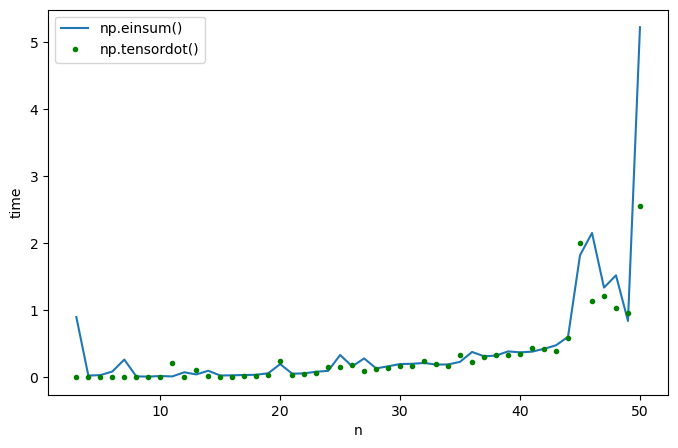

In [6]:
plt.figure(figsize = (8,5))

plt.plot(test_time[2], test_time[0], '-', label = 'np.einsum()')
plt.plot(test_time[2], test_time[1], '.', c = 'green', label = 'np.tensordot()')
plt.legend(loc='best')
plt.xlabel('n')
plt.ylabel('time')

plt.show()